<a href="https://colab.research.google.com/github/AustinKarki/75-Days-of-Coding-Challenge/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 2 oota variable ko relation herna
# 2 types
#   simple linear regression(2 variable)
#   muliple linear regression(mulriplw variable)


# fine the sales from down dataset

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
advertising=pd.read_csv("/content/drive/MyDrive/Techaxis/advertising.csv")
advertising.head()

# target- one(Sales)
# features-TV,Radio,Newspaper

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
 # DATA INSPECTION
 # DATA CLEANING (ISNULL,OUTLIERS)
 # EXPLORATORY DATA ANALYSIS

 # MODEL BUILDING AND MODEL EVLUATION - MACHINE LEARNING

#  CORELATION AND REGRESSION ARE STATICAL TECHINIQUE(VARIABLE BICH KO RELATION SHOW GARXA    MODEL OR VARIABLE BICH KATTI KO RELATION XA   HOW ONE VARIABLE AFFECT OTHER)


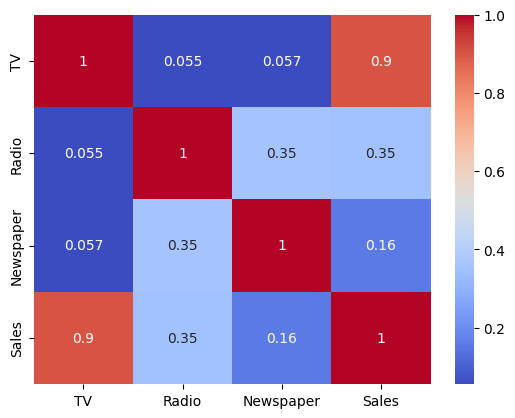

In [5]:
# CORELATION MATRIX

sns.heatmap(advertising.corr(),cmap='coolwarm',annot=True)
plt.show()

In [6]:
# simple linear regression

# y=mx + c (y-pred or yhat or yresponce)

# y= prediction or responce
# c=intercept
# m=coefficent

# in our case:

#  y(sales)= c+ m * TV ######(slope)

In [7]:
# statsmodels

# X -features
# Y- Prediction

X=advertising["TV"]
Y=advertising['Sales']

In [8]:
Y.head()

,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9


In [9]:
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [10]:
# TRAIN-TEST SPLIT

# 100% - 80% train and 20% test automatic

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8 ,random_state=100)

In [11]:
import statsmodels.api as sm #line fit in dataset which passes through origin but in order but intecept find manually

In [12]:
# adding a constant to get an intercept
X_train_sm=sm.add_constant(X_train)

#now, fitting the regresion line using OLS (ordinary least Squares)
lr=sm.OLS(Y_train,X_train_sm).fit()


In [13]:
# again printing the parameter like the intercept and the slope of the regression line
lr.params

,0
const,6.995533
TV,0.054105


In [14]:
# PERFORMING A SUMMARY OPERAION LISTS OUT OF ALL THE DIFFERENT
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     727.7
Date:                Sun, 19 Jan 2025   Prob (F-statistic):           5.03e-61
Time:                        20:05:55   Log-Likelihood:                -359.57
No. Observations:                 160   AIC:                             723.1
Df Residuals:                     158   BIC:                             729.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9955      0.343     20.386      0.0

In [15]:
# coefficient and significance(p-values) #hypthesis#### (0.05 less null hyothesis and more alternative hypothesis )
# p<0.05 statically significant
##### p>0.05 hypotheisi


# r-squared (statical measure): coefficient of determination:feature ra target ko proportion
# 0.82
# meaning that 82% of the varience in sales is explained by TV
# this is decent R squred value.   more is better


# f statistic
# if p is low f stas is low

# sales=mx+c

# y=mx +c
# sales=6.948 + 0.054 * TV

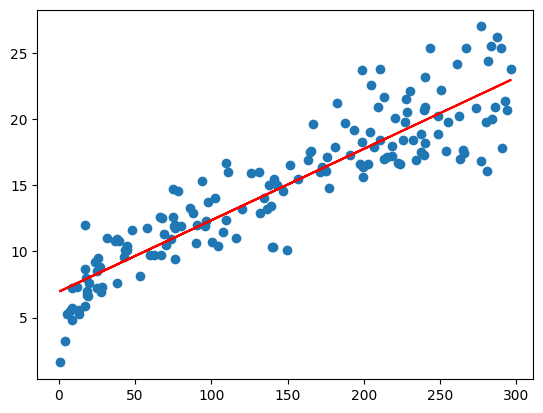

In [16]:
plt.scatter(X_train,Y_train)
plt.plot(X_train,6.948 + 0.054 * X_train, 'r')
plt.show()

In [17]:
# Model Evaluation (residual analysis(calculated from normal distribution)(distance calculation to find error term)) districution of error

In [18]:
y_train_pred=lr.predict(X_train_sm)
res=(Y_train-y_train_pred)

## Probability and static for engineers tek bahadur budathoki

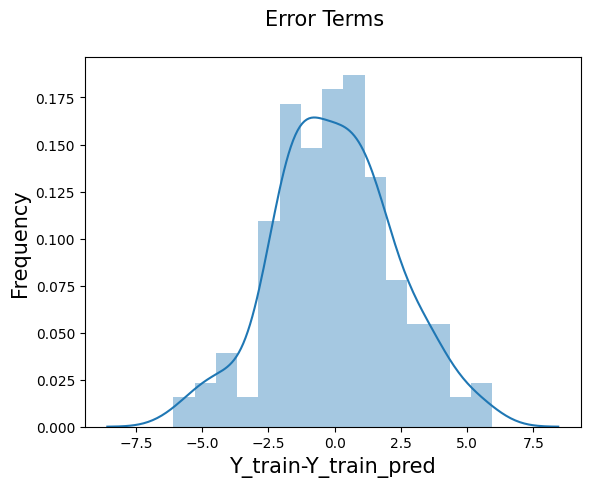

In [23]:
fig =plt.figure()
sns.distplot(res,bins=15)
fig.suptitle('Error Terms',fontsize=15)
plt.xlabel('Y_train-Y_train_pred',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.show() # bell curve(normally distriuted,guession distribution, standard distribution)

In [26]:
# predict on test set
X_test_sm=sm.add_constant(X_test)
y_pred=lr.predict(X_test_sm)

In [27]:
y_pred.head()

,0
126,7.417556
104,19.883459
99,14.310594
92,18.774296
111,20.072828


In [30]:
# r2 square
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [32]:
np.sqrt(mean_squared_error(Y_test,y_pred))

2.3126831803046124

In [33]:
r_squared=r2_score(Y_test,y_pred)
r_squared

0.728135274407888